In [1]:
import pandas as pd
import numpy as np

In [243]:
df_App_Details = pd.read_csv("App_Details.csv")
df_App_Ranking =pd.read_csv("App_Ranking.csv")
df_App_Usage =pd.read_csv("Overall_Usage.csv")
                           

In [73]:
df_App_Details.columns

Index(['Date', 'Usage', 'Notifications', 'Times opened', 'App'], dtype='object')

In [75]:
df_App_Ranking.head()

,Date,Rank 1,Rank 2,Rank 3
0,08/26/2022,Whatsapp,Instagram,Netflix
1,08/27/2022,Whatsapp,Instagram,Chrome
2,08/28/2022,Whatsapp,Instagram,WeChat
3,08/29/2022,Whatsapp,Chrome,WeChat
4,08/30/2022,Whatsapp,LinkedIn,Chrome


In [9]:
df_App_Usage.columns

Index(['Date ', 'Total Usage', 'Notifications', 'Unlocks'], dtype='object')

In [245]:
df_App_Usage.rename(columns={'Notifications':'Notifications_Total','Date ':'Date'},inplace=True)

In [247]:
new= pd.merge(df_App_Details,df_App_Usage,how="left",on="Date")
new.head()

,Date,Usage,Notifications,Times opened,App,Total Usage,Notifications_Total,Unlocks
0,08/26/2022,38,70,49,Instagram,236,600,102
1,08/27/2022,39,43,48,Instagram,194,411,96
2,08/28/2022,64,231,55,Instagram,301,709,114
3,08/29/2022,14,35,23,Instagram,190,542,119
4,08/30/2022,3,19,5,Instagram,204,583,85


In [249]:
new['Times opened']= (new['Times opened']/new['Unlocks'])*100
new['Usage']= (new['Usage']/new['Total Usage'])*100
new['Notifications']= (new['Notifications']/new['Notifications_Total'])*100

new.head()

,Date,Usage,Notifications,Times opened,App,Total Usage,Notifications_Total,Unlocks
0,08/26/2022,16.101695,11.666667,48.039216,Instagram,236,600,102
1,08/27/2022,20.103093,10.462287,50.000000,Instagram,194,411,96
2,08/28/2022,21.262458,32.581100,48.245614,Instagram,301,709,114
3,08/29/2022,7.368421,6.457565,19.327731,Instagram,190,542,119
4,08/30/2022,1.470588,3.259005,5.882353,Instagram,204,583,85


In [251]:
new.drop(['Total Usage','Notifications_Total','Unlocks'],axis='columns',inplace=True)

In [253]:
new.head()

,Date,Usage,Notifications,Times opened,App
0,08/26/2022,16.101695,11.666667,48.039216,Instagram
1,08/27/2022,20.103093,10.462287,50.000000,Instagram
2,08/28/2022,21.262458,32.581100,48.245614,Instagram
3,08/29/2022,7.368421,6.457565,19.327731,Instagram
4,08/30/2022,1.470588,3.259005,5.882353,Instagram


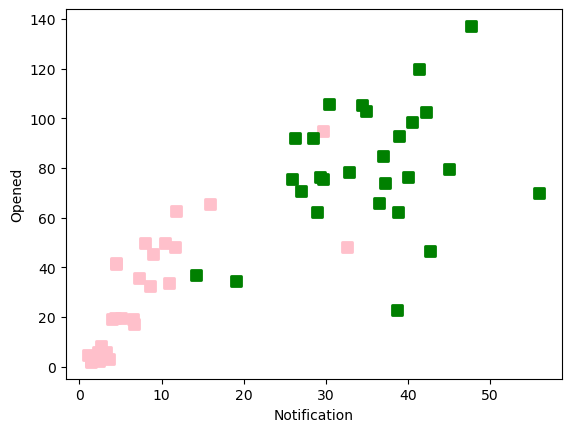

In [25]:
import matplotlib.pyplot as plt
xi=new[new['App']=='Instagram']['Notifications']
yi=new[new['App']=='Instagram']['Times opened']
zi=new[new['App']=='Instagram']['Usage']

xw=new[new['App']=='Whatsapp']['Notifications']
yw=new[new['App']=='Whatsapp']['Times opened']
zw=new[new['App']=='Whatsapp']['Usage']


plt.scatter(xi, yi ,c ="pink", 
            linewidths = 2, 
            marker ="s", 
            s = 50)
plt.scatter(xw, yw,c ="green", 
            linewidths = 2, 
            marker ="s", 
            s = 50)

plt.xlabel("Notification")
plt.ylabel("Opened")
plt.show()

<Axes: xlabel='Notifications', ylabel='Times opened'>

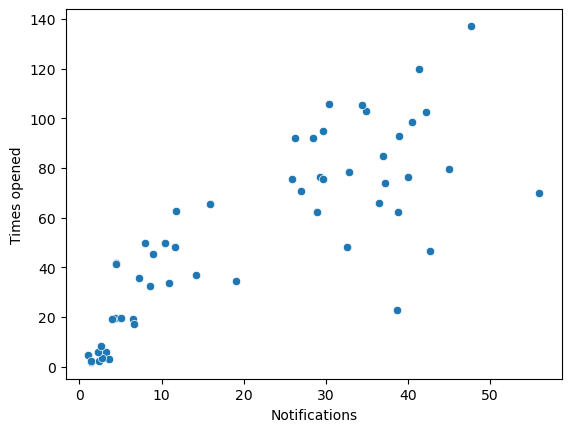

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=new['Notifications'],y=new['Times opened'])

In [136]:
df_App_Ranking.rename(columns={'Date ':'Date'},inplace=True)

In [138]:
df_App_Ranking.columns

Index(['Date', 'Rank 1', 'Rank 2', 'Rank 3'], dtype='object')

In [140]:
All=pd.merge(new,df_App_Ranking,how="left",on="Date")
All.head()

,Date,Usage,Notifications,Times opened,App,Rank 1,Rank 2,Rank 3
0,08/26/2022,16.101695,11.666667,48.039216,Instagram,Whatsapp,Instagram,Netflix
1,08/27/2022,20.103093,10.462287,50.000000,Instagram,Whatsapp,Instagram,Chrome
2,08/28/2022,21.262458,32.581100,48.245614,Instagram,Whatsapp,Instagram,WeChat
3,08/29/2022,7.368421,6.457565,19.327731,Instagram,Whatsapp,Chrome,WeChat
4,08/30/2022,1.470588,3.259005,5.882353,Instagram,Whatsapp,LinkedIn,Chrome


In [305]:
new.head()

,Weekend,Risk,Notifications,Times opened,App
0,0,0,11.666667,48.039216,0
1,1,0,10.462287,50.000000,0
2,1,0,32.581100,48.245614,0
3,0,0,6.457565,19.327731,0
4,0,0,3.259005,5.882353,0


In [255]:
from sklearn.preprocessing import LabelEncoder
new[['App']]= new[['App']].apply(LabelEncoder().fit_transform)


In [257]:
new.rename(columns={'Usage':'Risk'},inplace=True)
new['Risk']=np.where(new['Risk']>30,1,0)

In [261]:
new['Date']=pd.to_datetime(new['Date'], dayfirst=True)
new['Date'] =new['Date'].dt.day_name()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7828\1850049233.py:1: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  new['Date']=pd.to_datetime(new['Date'], dayfirst=True)


In [291]:
new1 = new

In [303]:

new.loc[(new['Date']=='Saturday') | (new['Date']=='Sunday'),'Date']=1
new.loc[(new['Date']!=1),'Date']=0
new.rename(columns={'Date':'Weekend'},inplace=True)

In [443]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(new.drop('Risk',axis=1),new['Risk'], test_size=0.2)

In [445]:
X_train.head()

,Weekend,Notifications,Times opened,App
15,1,15.883669,65.420561,0
50,1,41.336971,120.000000,1
9,1,10.861423,33.707865,0
34,0,26.277372,91.964286,1
24,0,1.405975,2.158273,0


In [451]:
from sklearn.preprocessing import MinMaxScaler
sclr= MinMaxScaler()
X_train_scaled= sclr.fit_transform(X_train)
X_test_scaled= sclr.fit_transform(X_test)


In [453]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train_scaled,Y_train)


LogisticRegression()

In [455]:
Y_pred=model.predict(X_test_scaled)

In [335]:
Y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [457]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(Y_test, Y_pred)) 

0.9090909090909091


Implementing ANN(Artificial Neural Network)

In [459]:
X_train_scaled

array([[1.        , 0.26948186, 0.53761605, 0.        ],
       [1.        , 0.73318393, 1.        , 1.        ],
       [1.        , 0.17798781, 0.26895368, 0.        ],
       [0.        , 0.45883182, 0.76248813, 1.        ],
       [0.        , 0.00573076, 0.00167308, 0.        ],
       [1.        , 0.5736716 , 0.39211401, 0.        ],
       [1.        , 0.11212977, 0.28595159, 0.        ],
       [0.        , 0.60608262, 0.87734138, 1.        ],
       [0.        , 0.68605511, 0.50966475, 1.        ],
       [0.        , 0.19380874, 0.51352343, 0.        ],
       [0.        , 0.1258591 , 0.40697674, 0.        ],
       [0.        , 0.02109768, 0.03381585, 0.        ],
       [0.        , 0.02925207, 0.01408349, 0.        ],
       [1.        , 0.        , 0.02189671, 0.        ],
       [1.        , 0.57705126, 0.64784053, 1.        ],
       [1.        , 0.65666013, 0.60887385, 1.        ],
       [1.        , 0.17071645, 0.40697674, 0.        ],
       [0.        , 0.10085851,

In [343]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [557]:
model_sq =  Sequential()
model_sq.add(Dense(3,activation = 'relu',input_dim = 4))
model_sq.add(Dense(2,activation = 'sigmoid'))
model_sq.add(Dense(1,activation = 'sigmoid'))

D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [559]:
model_sq.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26 (104.00 B)

 Trainable params: 26 (104.00 B)

 Non-trainable params: 0 (0.00 B)

In [603]:
model_sq.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['Accuracy'])

In [619]:
model_sq.fit(X_train_scaled,Y_train,epochs =70,validation_split=0.1)

Epoch 1/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - Accuracy: 0.8322 - loss: 0.4826 - val_Accuracy: 1.0000 - val_loss: 0.3345
Epoch 2/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - Accuracy: 0.8322 - loss: 0.4846 - val_Accuracy: 1.0000 - val_loss: 0.3341
Epoch 3/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - Accuracy: 0.8322 - loss: 0.4818 - val_Accuracy: 1.0000 - val_loss: 0.3335
Epoch 4/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - Accuracy: 0.8322 - loss: 0.4822 - val_Accuracy: 1.0000 - val_loss: 0.3329
Epoch 5/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - Accuracy: 0.8635 - loss: 0.4571 - val_Accuracy: 1.0000 - val_loss: 0.3324
Epoch 6/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - Accuracy: 0.8427 - loss: 0.4723 - val_Accuracy: 1.0000 - val_loss: 0.3319
Epoch 7/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - Accuracy: 0.8427 - loss: 0.4760 - val_Accuracy: 1.0000 - val_loss: 0.3314
Epoch 8/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - Accuracy: 0.8322 - loss: 0.4831 - val_Accuracy: 1.0000 - val_loss:

In [621]:
y_pred_cn = model_sq.predict(X_test_scaled)
y_pred_cn= np.where(y_pred_cn>0.5,1,0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


In [623]:
print(accuracy_score(y_pred_cn,Y_test))

0.9090909090909091
